# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [9]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [11]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

In [12]:
# Build query URL and request your results in Celsius
query_url = f"{url}appid={weather_api_key}&units={units}&q="
# Get weather data
weather_response = requests.get(query_url).json

In [17]:
# set up lists to hold reponse info
# city_id = []
city_name = []
lat = []
lon = []
temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

In [18]:
# test_cities = ["Perth", "Auckland", "Bangkok", "Tokyo", "Paris"]

print("Beginning Data Retrieval")
print("------------------------- \n")

city_id = 0

for city in cities:
    # Get weather data
    
    print(f"Processing record {city_id} | {city}")
    weather_response = requests.get(query_url+city).json()   
    city_id = city_id + 1
    
    # Append data to DataFrame with exception handling for no cities found
    try:
        city_name.append(weather_response["name"])
        lat.append(weather_response["coord"]["lat"])
        lon.append(weather_response["coord"]["lon"])
        temp.append(weather_response["main"]["temp_max"])
        humidity.append(weather_response["main"]["humidity"])
        cloudiness.append(weather_response["clouds"]["all"])  
        wind_speed.append(weather_response["wind"]["speed"]) 
        country.append(weather_response["sys"]["country"]) 
        date.append(weather_response["dt"]) 
    
    except KeyError:
        print("City not found")
        pass
            
print("\n-----------------------")
print("Data Retrieval Completed")
print("-------------------------")  

Beginning Data Retrieval
------------------------- 

Processing record 0 | castro
Processing record 1 | havelock
Processing record 2 | klaksvik
Processing record 3 | vaini
Processing record 4 | georgetown
Processing record 5 | barentsburg
City not found
Processing record 6 | mataura
Processing record 7 | faanui
Processing record 8 | albany
Processing record 9 | ribeira grande
Processing record 10 | dingle
Processing record 11 | kamenskoye
City not found
Processing record 12 | los algarrobos
Processing record 13 | barrow
Processing record 14 | ushuaia
Processing record 15 | ossora
Processing record 16 | carberry
Processing record 17 | evensk
Processing record 18 | leningradskiy
Processing record 19 | east london
Processing record 20 | jibuti
Processing record 21 | kavaratti
Processing record 22 | busselton
Processing record 23 | costa rica
Processing record 24 | amderma
City not found
Processing record 25 | ahipara
Processing record 26 | toftir
City not found
Processing record 27 | beth

City not found
Processing record 237 | zoniana
Processing record 238 | liverpool
Processing record 239 | hithadhoo
Processing record 240 | grindavik
Processing record 241 | belmonte
Processing record 242 | kysyl-syr
Processing record 243 | grand gaube
Processing record 244 | preobrazheniye
Processing record 245 | grao mogol
Processing record 246 | verkhoyansk
Processing record 247 | dimona
Processing record 248 | movila banului
Processing record 249 | yiyang
Processing record 250 | dongying
Processing record 251 | zmievka
City not found
Processing record 252 | port hawkesbury
Processing record 253 | hovd
Processing record 254 | peniche
Processing record 255 | koubia
Processing record 256 | norman wells
Processing record 257 | christchurch
Processing record 258 | souillac
Processing record 259 | ponta do sol
Processing record 260 | deputatskiy
Processing record 261 | chake chake
Processing record 262 | puerto del rosario
Processing record 263 | bandarbeyla
Processing record 264 | lilles

City not found
Processing record 475 | natal
Processing record 476 | ipora
Processing record 477 | neiafu
Processing record 478 | sumkino
Processing record 479 | bud
Processing record 480 | santa cruz
Processing record 481 | puerto escondido
Processing record 482 | coffs harbour
Processing record 483 | kiama
Processing record 484 | qiongshan
Processing record 485 | prince rupert
Processing record 486 | karauzyak
City not found
Processing record 487 | flinders
Processing record 488 | tuatapere
Processing record 489 | gbarnga
Processing record 490 | belaya gora
Processing record 491 | cascais
Processing record 492 | galesong
Processing record 493 | oranjestad
Processing record 494 | taoudenni
Processing record 495 | san francisco
Processing record 496 | acton vale
Processing record 497 | buala
Processing record 498 | portland
Processing record 499 | pangoa
Processing record 500 | kholtoson
Processing record 501 | petropavlovka
Processing record 502 | sakleshpur
Processing record 503 | so

In [19]:
# Create dictionary for the data lists
weather_dict = {
    "city": city_name,
    "lat": lat,
    "lon": lon,
    "max_temp": temp,
    "humidity": humidity,
    "cloudiness" : cloudiness,
    "wind speed" : wind_speed,
    "country": country,
    "date": date        
}
weather_dict

{'city': ['Castro',
  'Havelock',
  'Klaksvík',
  'Vaini',
  'George Town',
  'Mataura',
  'Faanui',
  'Albany',
  'Ribeira Grande',
  'Dingle',
  'Los Algarrobos',
  'Barrow',
  'Ushuaia',
  'Ossora',
  'Carberry',
  'Evensk',
  'Leningradskiy',
  'East London',
  'Djibouti',
  'Kavaratti',
  'Busselton',
  'Costa Rica',
  'Ahipara',
  'Bethel',
  'Royan',
  'Butaritari',
  'Tuktoyaktuk',
  'Cherskiy',
  'Erenhot',
  'Dundee',
  'Hobart',
  'Vostok',
  'Jalcocotán',
  'Hermanus',
  'Nikolskoye',
  'Bluff',
  'Washington',
  'San Cristobal',
  'Zhigansk',
  'Harper',
  'Nouadhibou',
  'Yaguajay',
  'Punta Arenas',
  'Faya',
  'Atuona',
  'Jagdalpur',
  'Isangel',
  'Jamestown',
  'Lima',
  'Touros',
  'New Norfolk',
  'Rikitea',
  'Saint-Philippe',
  'Kapaa',
  'Puerto Baquerizo Moreno',
  'Naruja',
  'Puerto Ayora',
  'Tasiilaq',
  'Tiksi',
  'Cabo San Lucas',
  'Chapais',
  'Calabar',
  'Avarua',
  'Makakilo City',
  'Khatanga',
  'Aklavik',
  'Hobyo',
  'Bograd',
  'San Patricio',
 

In [23]:
# Create DataFrame for city weather
city_weather_data = pd.DataFrame(weather_dict)
city_weather_data.head(10)

,city,lat,lon,max_temp,humidity,cloudiness,wind speed,country,date
0,Castro,-24.79,-50.01,44.58,76,5,3.06,BR,1593692519
1,Havelock,34.88,-76.90,75.99,94,1,3.40,US,1593692724
2,Klaksvík,62.23,-6.59,48.20,70,94,16.11,FO,1593692725
3,Vaini,-21.20,-175.20,71.60,68,75,112.74,TO,1593692478
4,George Town,5.41,100.34,86.00,79,20,4.70,MY,1593692486
5,Mataura,-46.19,168.86,39.00,83,3,3.00,NZ,1593692462
6,Faanui,-16.48,-151.75,80.13,80,74,22.88,PF,1593692846
7,Albany,42.60,-73.97,68.00,87,0,4.38,US,1593692490
8,Ribeira Grande,38.52,-28.70,69.80,68,20,5.82,PT,1593692847
9,Dingle,11.00,122.67,79.52,80,94,4.05,PH,1593692489


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [210]:
# Export city data to csv
city_weather_data.to_csv("../Output/city.csv", header=True)

In [25]:
city_weather_data.head()

,city,lat,lon,max_temp,humidity,cloudiness,wind speed,country,date
0,Castro,-24.79,-50.01,44.58,76,5,3.06,BR,1593692519
1,Havelock,34.88,-76.90,75.99,94,1,3.40,US,1593692724
2,Klaksvík,62.23,-6.59,48.20,70,94,16.11,FO,1593692725
3,Vaini,-21.20,-175.20,71.60,68,75,112.74,TO,1593692478
4,George Town,5.41,100.34,86.00,79,20,4.70,MY,1593692486


City          550
Lat           550
Lng           550
Max Temp      550
Humidity      550
Cloudiness    550
Wind Speed    550
Country       550
Date          550
dtype: int64

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pimentel,-6.84,-79.93,66.20,29,75,5.82,PE,1585764415
1,victoria,22.29,114.16,69.01,88,40,18.34,HK,1585764288
2,padang,-0.95,100.35,79.90,75,99,1.63,ID,1585764115
3,hasaki,35.73,140.83,55.00,100,75,4.70,JP,1585764415
4,kahului,20.89,-156.47,70.00,88,1,7.63,US,1585764415


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [26]:
# inspect data to check if humidity > 100%
city_weather_data.describe()

,lat,lon,max_temp,humidity,cloudiness,wind speed,date
count,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,5.590000e+02
mean,19.735635,21.536655,69.496977,69.454383,48.660107,8.209928,1.593693e+09
std,33.485213,92.090973,16.049008,21.656267,38.066049,7.044248,2.024351e+02
min,-54.800000,-179.170000,26.600000,5.000000,0.000000,0.200000,1.593692e+09
25%,-7.900000,-59.130000,57.930000,58.000000,5.500000,4.040000,1.593693e+09
50%,22.680000,24.800000,72.000000,74.000000,42.000000,6.850000,1.593693e+09
75%,48.820000,109.295000,80.580000,84.000000,87.000000,10.615000,1.593693e+09
max,78.220000,178.420000,117.320000,100.000000,100.000000,112.740000,1.593693e+09


   There are no cities with humidity > 100%

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

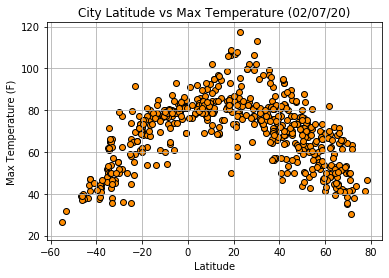

In [67]:
# Create scatter plot for maximum temperature
plt.scatter(city_weather_data["lat"], city_weather_data["max_temp"], facecolors="darkorange", edgecolors="black")

plt.title("City Latitude vs Max Temperature (02/07/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.ylim(18, 122)
plt.grid()

# Save plot as image
plt.savefig("Images/max_temp.png")
plt.show()


The scatter plot is showing the relationship between the location of the city and max. temperature.  It is trying to analyse the max. temperature increases/decreases for the cities in the data set in different geographic regions. Most of the cities' max temperature falls between the range of 60-80F.

## Latitude vs. Humidity Plot

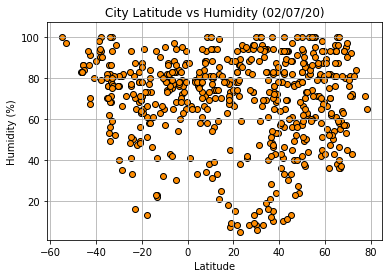

In [212]:
# Create scatter plot for humidity
plt.scatter(city_weather_data["lat"], city_weather_data["humidity"], facecolors="darkorange", edgecolors="black")

plt.title("City Latitude vs Humidity (02/07/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(1, 107)
plt.grid()

# Save plot as image
plt.savefig("Images/humidity.png")
plt.show()

The scatter plot is showing the relationship between humidity level and the location of the cities. There is little correlation between the humidity and the latitudes of the cities.  Most of the cities' in this data set has high humidity levels from 60%-100%.

## Latitude vs. Cloudiness Plot

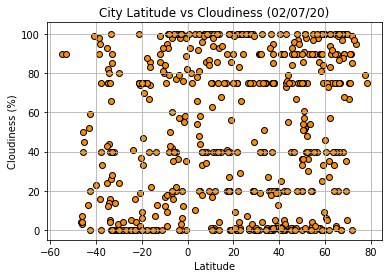

In [69]:
# Create scatter plot for cloudiness
plt.scatter(city_weather_data["lat"], city_weather_data["cloudiness"], facecolors="darkorange", edgecolors="black")

plt.title("City Latitude vs Cloudiness (02/07/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.ylim(-5, 106)
plt.grid()

# Save plot as image
plt.savefig("Images/cloudiness.png")
plt.show()

The scatter plot is showing the relationship between cloudiness level and the location of the cities. The cloudiness level for most cities falls between <20% or >80%.

## Latitude vs. Wind Speed Plot

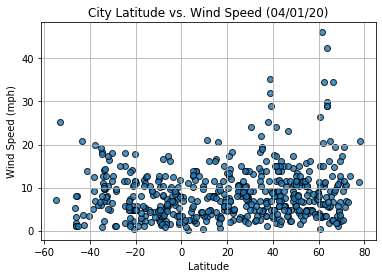

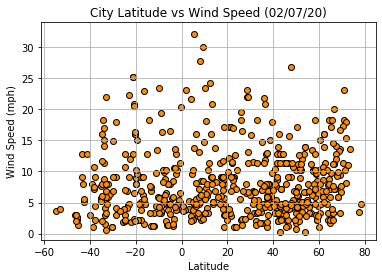

In [70]:
plt.scatter(city_weather_data["lat"], city_weather_data["wind speed"], facecolors="darkorange", edgecolors="black")

plt.title("City Latitude vs Wind Speed (02/07/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-1, 34)
plt.grid()

# Save plot as image
plt.savefig("Images/wind_speed.png")
plt.show()

The scatter plot is showing the relationship between wind speed and the location of the cities. The cloudiness level for most cities falls is less than 10mph.

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots

In [15]:
# Create Northern and Southern Hemisphere DataFrames

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [88]:
# Filter the data by northern & southern hemisphere
northern_hemp = city_weather_data.loc[city_weather_data["lat"] >= 0]
southern_hemp = city_weather_data.loc[city_weather_data["lat"] < 0]

In [211]:
northern_hemp.head()

,city,lat,lon,max_temp,humidity,cloudiness,wind speed,country,date
1,Havelock,34.88,-76.90,75.99,94,1,3.40,US,1593692724
2,Klaksvík,62.23,-6.59,48.20,70,94,16.11,FO,1593692725
4,George Town,5.41,100.34,86.00,79,20,4.70,MY,1593692486
7,Albany,42.60,-73.97,68.00,87,0,4.38,US,1593692490
8,Ribeira Grande,38.52,-28.70,69.80,68,20,5.82,PT,1593692847


In [213]:
# Create function for linear regression plot

def lin_regression_plot(x_values, y_values):
    
    fig = plt.figure()
    
    #Calculate the linear regresssion 
    slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
#     print("slope", slope)
#     print("intercept", intercept)
#     print("coefficient", rvalue)

     # Create line equation string
    weather_regression = x_values * slope + intercept  
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    weather_eq = line_eq
    
    plt.scatter(x_values, y_values, facecolors="lightblue", edgecolors="black")
    plt.plot(x_values, weather_regression, "r-")
    
    # Print r square value
    print(f"The r-squared is: {rvalue**2}")
    
    return weather_eq

The r-squared is: 0.4881015602696647


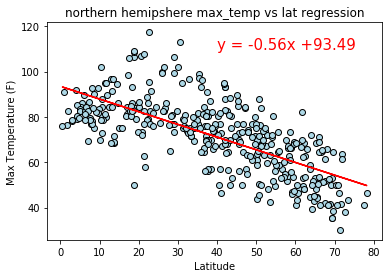

In [214]:
# Set the x and y values for the linear regression plot
x_values = northern_hemp["lat"]
y_values = northern_hemp["max_temp"]

# Call function to plot linear regression
weather_plot = lin_regression_plot(x_values, y_values)
plt.title("northern hemipshere max_temp vs lat regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.annotate(weather_plot,(40,110),fontsize=15,color="red")

# Save plot as image 
plt.savefig("Images/nh_temp_regression.png")

There is negative correlation between the latitude of the cities and max. temperature.  We can see that the max temperature falling gradually as the latitude increases for cities in the northern hemisphere. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6952580436636222


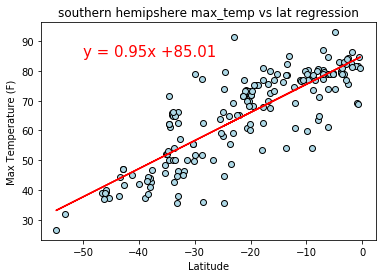

In [215]:
# Set the x and y values for the linear regression plot
x_values = southern_hemp["lat"]
y_values = southern_hemp["max_temp"]

# Call function to plot linear regression
weather_plot = lin_regression_plot(x_values, y_values)
plt.title("southern hemipshere max_temp vs lat regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.annotate(weather_plot,(-50,85),fontsize=15,color="red")

# Save plot as image 
plt.savefig("Images/sh_temp_regression.png")

There is strong positive correlation between the latitude of the cities and max. temperature.  We can see that the max temperature increasing as the latitude increases for cities in the southern hemisphere.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0009761850058568972


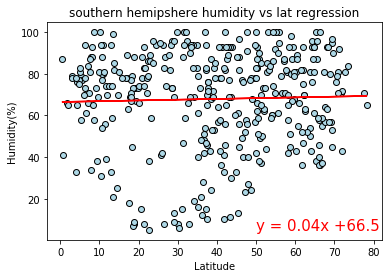

In [216]:
# Set the x and y values for the linear regression plot
x_values = northern_hemp["lat"]
y_values = northern_hemp["humidity"]

# Call function to plot linear regression
weather_plot = lin_regression_plot(x_values, y_values)
plt.title("southern hemipshere humidity vs lat regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.annotate(weather_plot,(50,5),fontsize=15,color="red")

# Save plot as image 
plt.savefig("Images/nh_humidity_regression.png")

There is very weak or no correlation between the latitude of the cities and humidity level in the northern hemisphere

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.03086384461506185


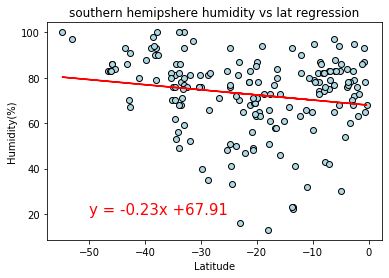

In [217]:
# Set the x and y values for the linear regression plot
x_values = southern_hemp["lat"]
y_values = southern_hemp["humidity"]

# Call function to plot linear regression
weather_plot = lin_regression_plot(x_values, y_values)
plt.title("southern hemipshere humidity vs lat regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.annotate(weather_plot,(-50,20),fontsize=15,color="red")

# Save plot as image 
plt.savefig("Images/sh_humidity_regression.png")

There is negative correlation between the latitude of the cities and the humidity level in the southern hemisphere.  However, the humidity level does not descrease much with increasing latitude coordinates. It still remains high (>80%) for most of the cities.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0014649014679582726


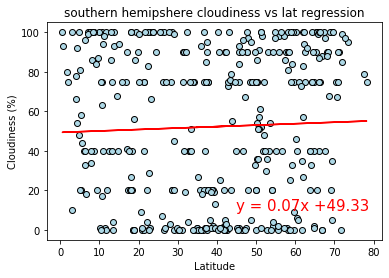

In [218]:
# Set the x and y values for the linear regression plot
x_values = northern_hemp["lat"]
y_values = northern_hemp["cloudiness"]

# Call function to plot linear regression
weather_plot = lin_regression_plot(x_values, y_values)
plt.title("southern hemipshere cloudiness vs lat regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.annotate(weather_plot,(45,10),fontsize=15,color="red")

# Save plot as image 
plt.savefig("Images/nh_cloudiness_regression.png")

There is very weak or no correlation between the latitude of the cities and cloudiness level in the northern hemisphere.  The regression is relatively flat.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.021030278205770334


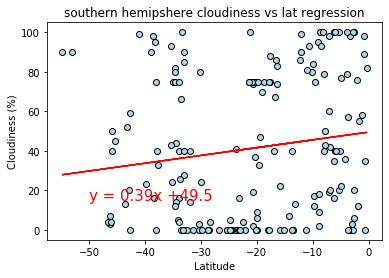

In [219]:
# Set the x and y values for the linear regression plot
x_values = southern_hemp["lat"]
y_values = southern_hemp["cloudiness"]

# Call function to plot linear regression
weather_plot = lin_regression_plot(x_values, y_values)
plt.title("southern hemipshere cloudiness vs lat regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.annotate(weather_plot,(-50,15),fontsize=15,color="red")

# Save plot as image 
plt.savefig("Images/sh_cloudiness_regression.png")

The correlation is not strong and the cloudiness level is too spread out from the mean.  

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 1.3942423820337605e-05


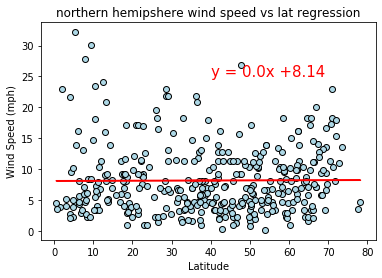

In [221]:
# Set the x and y values for the linear regression plot
x_values = northern_hemp["lat"]
y_values = northern_hemp["wind speed"]

# Call function to plot linear regression
weather_plot = lin_regression_plot(x_values, y_values)
plt.title("northern hemipshere wind speed vs lat regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.annotate(weather_plot,(40,25),fontsize=15,color="red")

# Save plot as image 
plt.savefig("Images/nh_windspeed_regression.png")

There is no correlation between the latitude of the cities and wind speed in the northern hemisphere.  Most of the wind speed falls in the range of 0-10 mph and the wind speed does not increase corresponding with increasing latitude coordinates.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0008794700810741887


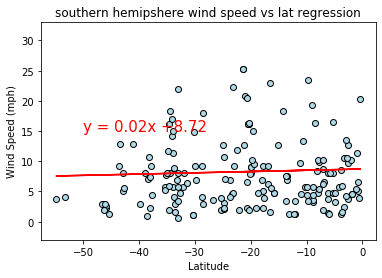

In [224]:
# Set the x and y values for the linear regression plot
x_values = southern_hemp["lat"]
y_values = southern_hemp["wind speed"]

# Call function to plot linear regression
weather_plot = lin_regression_plot(x_values, y_values)
plt.title("southern hemipshere wind speed vs lat regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-3, 33)
plt.annotate(weather_plot,(-50,15),fontsize=15,color="red")

# Save plot as image 
plt.savefig("Images/sh_windspeed_regression.png")

There is no correlation between the latitude of the cities and wind speed in the southern hemisphere. Most of the wind speed falls in the range of 0-10 mph and the wind speed does not increase corresponding with increasing latitude coordinates.